In [1]:
#import graphviz
import librosa
import librosa.display
import numpy as np
import pickle
import glob
import cv2
import matplotlib.pyplot as plt

import PIL
from PIL import Image

# %matplotlib inline

In [2]:
with open('../data/temp/specURLs.pkl', 'rb') as f:
    df = pickle.load(f)
    
print(df[0])

('01_10003_1-04_Shri_Visvanatham', '01_10003_1-04_Shri_Visvanatham_mel', '01_10003_1-04_Shri_Visvanatham_stft', 3)


In [3]:
# Read in spectrograms in color along will labels 

mels = []
stfts = []
labels = []

for i in range(len(df)):
    mels.append(cv2.imread('../data/img/melspec/'+ df[i][1] + '.png', 0))
    stfts.append(cv2.imread('../data/img/stft/' + df[i][2] + '.png', 0))
    labels.append(df[i][3])
    
mels = np.array(mels)
stfts = np.array(stfts)
print(mels.shape)
print(stfts.shape)

(118, 400, 1600)
(118, 400, 1600)


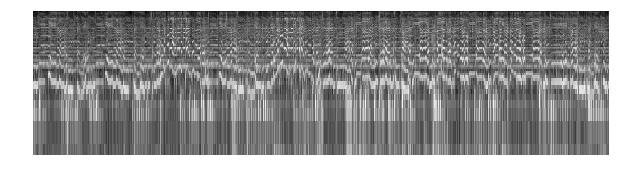

(118, 400, 1600)


In [4]:
# Grayscale Melspec 

fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.axis('off')
# plt.imshow(cv2.cvtColor(mels[0], cv2.COLOR_BGR2RGB))
plt.imshow(mels[0], cmap ='gray')
plt.savefig('../data/temp/grayscaleMel.png', dpi=200)
plt.show()

print(mels.shape)

In [5]:
# Resize a single melspec 
im = Image.fromarray(mels[0])
im = im.resize([512, 128], PIL.Image.ANTIALIAS)
im = np.array(im)

print(im.shape)

(128, 512)


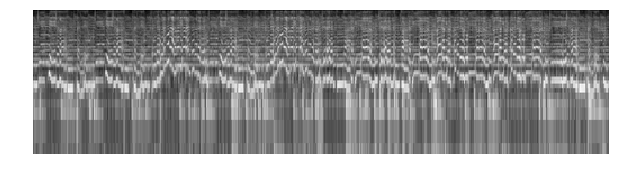

In [6]:
# Print and Save Resized melspec
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# Reshaped 
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.savefig('../data/temp/resizedMel.png', dpi=200)